In [1]:
import os
dir = os.getcwd()
dir

import pandas as pd
csv_name = 'csv_agileoutgoing_C_London'

csv_list = 'csv_agileoutgoing_C_London.csv'

csv_path = os.path.join(dir, 'data',csv_list)
csv_name= pd.read_csv(csv_path)


In [2]:
csv_agileoutgoing_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list))

In [3]:
column_names=['date_time', 'time', 'Letter', 'City', 'Price']
csv_agileoutgoing_C_London.columns = column_names
csv_agileoutgoing_C_London.head()

,date_time,time,Letter,City,Price
0,2019-05-15 23:30:00+00:00,00:30,C,London,4.24
1,2019-05-16 00:00:00+00:00,01:00,C,London,4.24
2,2019-05-16 00:30:00+00:00,01:30,C,London,4.24
3,2019-05-16 01:00:00+00:00,02:00,C,London,4.24
4,2019-05-16 01:30:00+00:00,02:30,C,London,4.24


In [4]:
csv_agileoutgoing_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84671 entries, 0 to 84670
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  84671 non-null  object 
 1   time       84671 non-null  object 
 2   Letter     84671 non-null  object 
 3   City       84671 non-null  object 
 4   Price      84671 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.2+ MB


In [5]:
df_agileoutgoing_C_London = pd.DataFrame(csv_agileoutgoing_C_London[['date_time', 'Price']])
df_agileoutgoing_C_London.columns = ['ds', 'y']
df_agileoutgoing_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84671 entries, 0 to 84670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      84671 non-null  object 
 1   y       84671 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].str.slice(stop=-6)

In [7]:
# Assuming 'ds' column has timezone information
# df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].dt.tz_localize(None)

# Now, convert 'ds' column to datetime without timezone
df_agileoutgoing_C_London['ds'] = pd.to_datetime(df_agileoutgoing_C_London['ds'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df_agileoutgoing_C_London.head()

,ds,y
0,2019-05-15 23:30:00,4.24
1,2019-05-16 00:00:00,4.24
2,2019-05-16 00:30:00,4.24
3,2019-05-16 01:00:00,4.24
4,2019-05-16 01:30:00,4.24


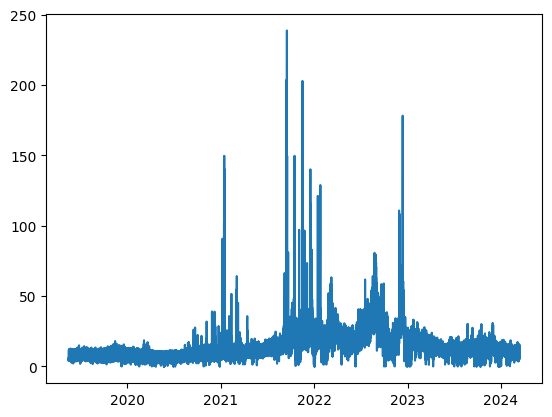

In [9]:
import matplotlib.pyplot as plt

plt.plot(df_agileoutgoing_C_London['ds'], df_agileoutgoing_C_London['y'])
plt.show()

In [36]:
df = df_agileoutgoing_C_London[df_agileoutgoing_C_London['ds']>'2022-01-01 00:00:00']

In [37]:
from datetime import timedelta

start_date = str(df['ds'][df.index[-1]] - timedelta(days=6*30))
end_date = str(df['ds'][df.index[-1]])
start_date, end_date

('2023-09-15 22:30:00', '2024-03-13 22:30:00')

In [38]:
df_test = df[(df['ds']>start_date) & (df['ds']<= end_date)]
df.shape, df_test.shape

((38541, 2), (8640, 2))

In [39]:
df.head()

,ds,y
46130,2022-01-01 00:30:00,8.42
46131,2022-01-01 01:00:00,9.96
46132,2022-01-01 01:30:00,5.86
46133,2022-01-01 02:00:00,7.95
46134,2022-01-01 02:30:00,1.30


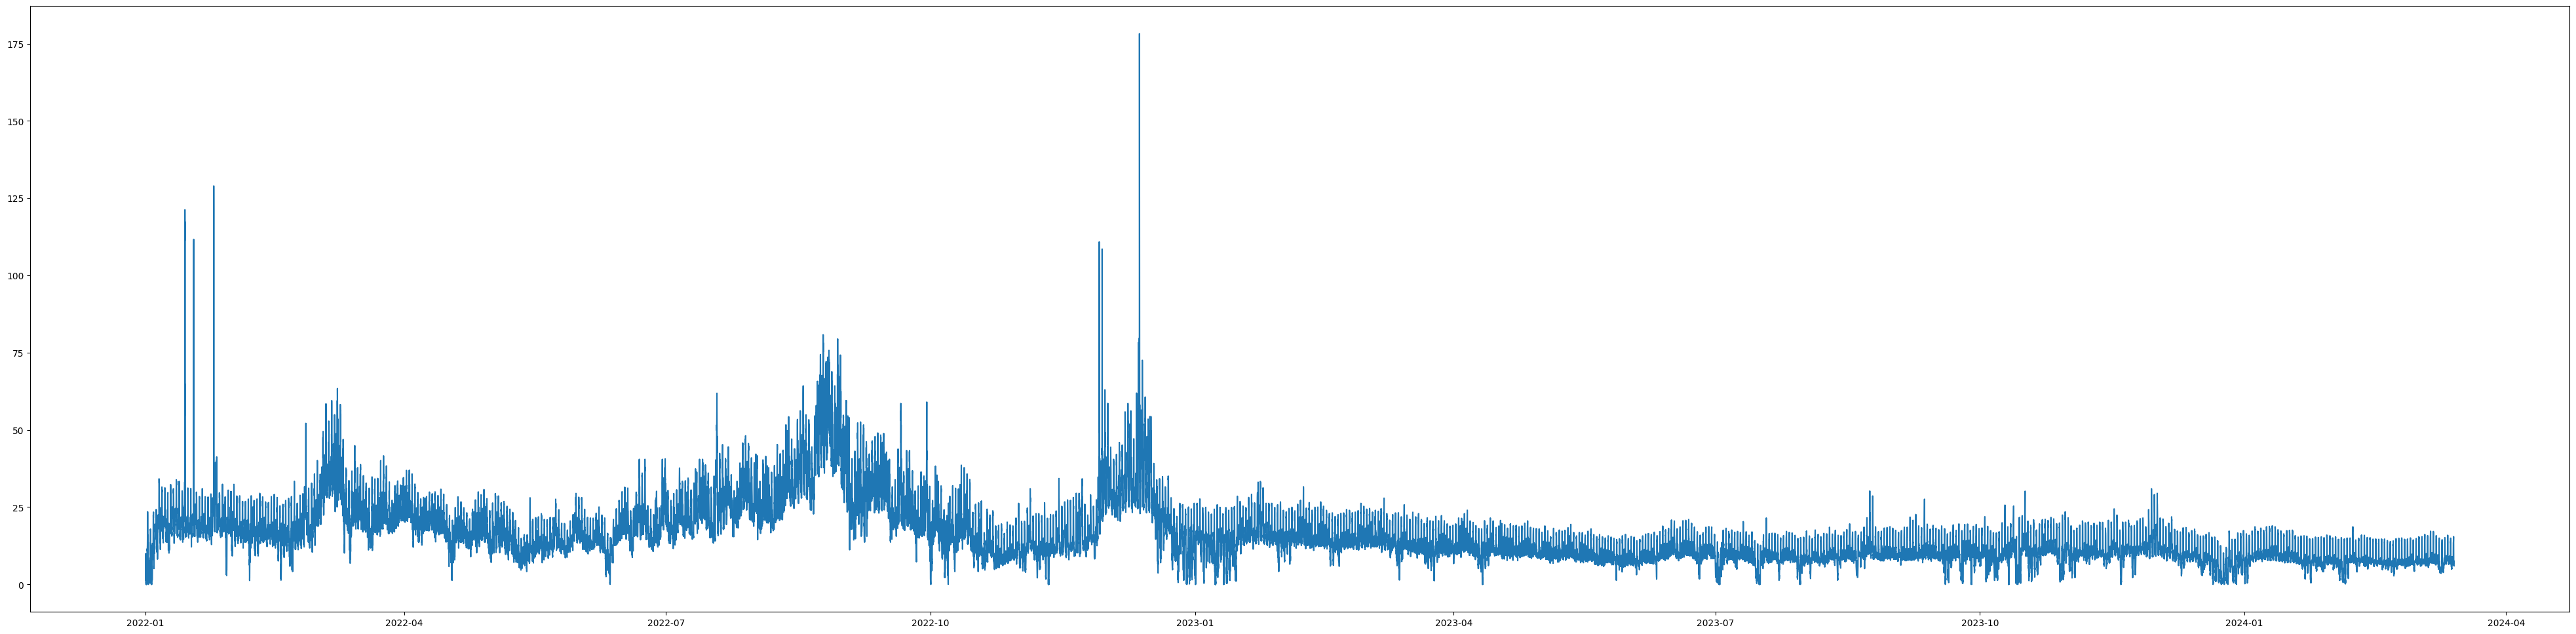

In [40]:
plt.figure(figsize=(50,12))
plt.plot(df['ds'], df['y'])
plt.show()

In [41]:
df['ds'][:10]

46130   2022-01-01 00:30:00
46131   2022-01-01 01:00:00
46132   2022-01-01 01:30:00
46133   2022-01-01 02:00:00
46134   2022-01-01 02:30:00
46135   2022-01-01 03:00:00
46136   2022-01-01 03:30:00
46137   2022-01-01 04:00:00
46138   2022-01-01 04:30:00
46139   2022-01-01 05:00:00
Name: ds, dtype: datetime64[ns]

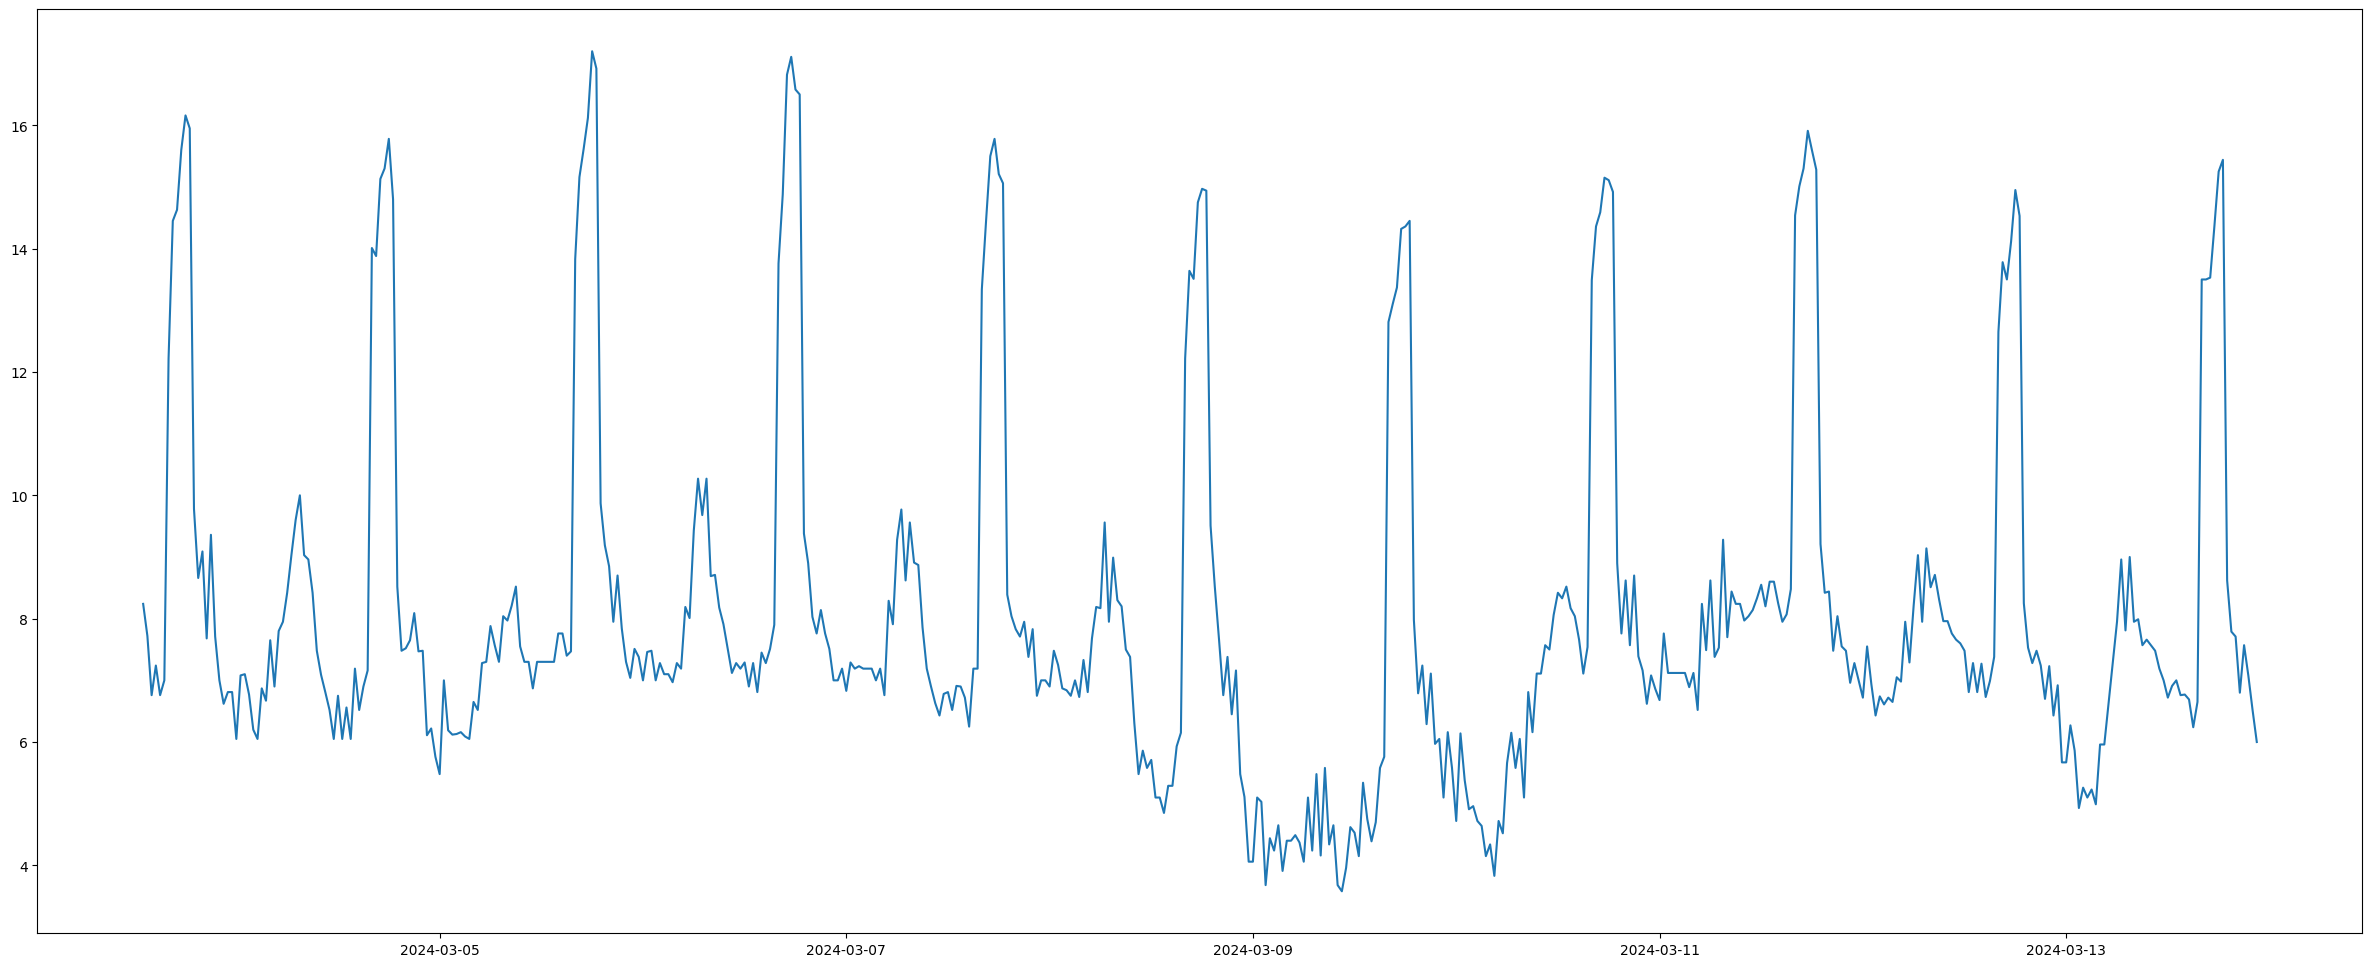

In [42]:
plt.figure(figsize=(30,12))
plt.plot(df['ds'][-500:], df['y'][-500:])
plt.show()

In [43]:
import numpy as np

In [44]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [45]:
split_ratio = round(df.shape[0]*0.9)
split_ratio, df.shape

(34687, (38541, 2))

In [46]:
train = df.iloc[:split_ratio]
test = df.iloc[split_ratio:]

check = len(train)+len(test)
check

38541

In [47]:
train['ds'][train.index[0]] - train['ds'][train.index[-1]]
# train['ds'][0]#- train['ds'][len(train)-1]

Timedelta('-723 days +09:00:00')

In [56]:
model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4, changepoint_range=0.8, interval_width=0.95)
model.fit(train)

21:10:58 - cmdstanpy - INFO - Chain [1] start processing
21:11:14 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
horizon = 24*270

future = model.make_future_dataframe(periods = horizon, freq='30min')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
41162,2024-05-07 13:30:00,17.611110,-247.938939,304.147449
41163,2024-05-07 14:00:00,18.429405,-258.411886,316.547930
41164,2024-05-07 14:30:00,19.659109,-274.317548,339.572634
41165,2024-05-07 15:00:00,21.184984,-302.235199,364.450278
41166,2024-05-07 15:30:00,22.821669,-323.677140,395.025595


/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


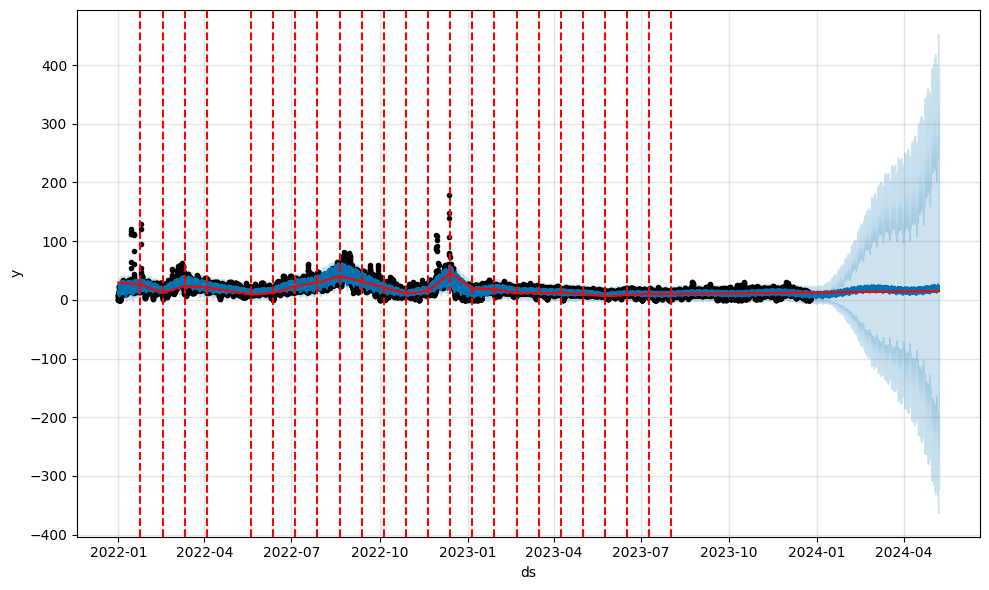

In [58]:
from prophet.plot import add_changepoints_to_plot

ax = model.plot(forecast)
# m = Prophet(changepoint_range=0.9)
a = add_changepoints_to_plot(ax.gca(), model, forecast)

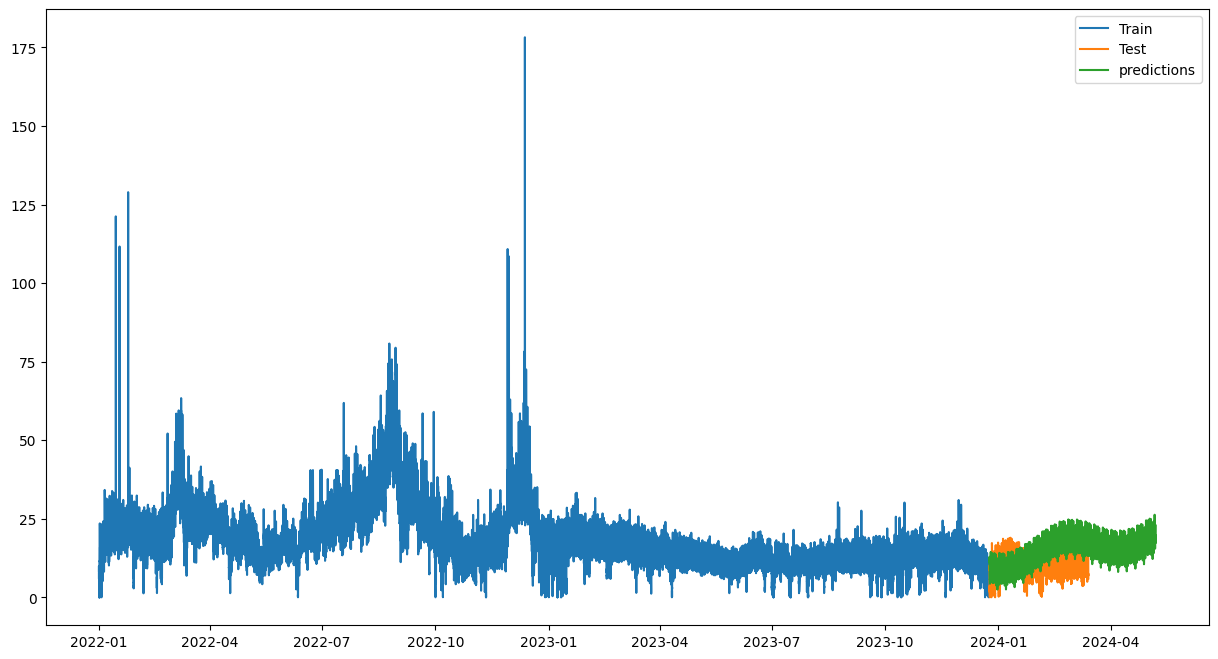

In [59]:
plt.figure(figsize=(15,8))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label='predictions')
plt.legend(loc='best')
plt.show()

In [60]:
df.shape

(38541, 2)

In [61]:
from datetime import timedelta
# train['ds'][0] - train['ds'][len(train)-1], train['ds'][0], train['ds'][0]+ timedelta(days=1)

train.tail()

,ds,y
80812,2023-12-24 13:30:00,1.40
80813,2023-12-24 14:00:00,1.54
80814,2023-12-24 14:30:00,1.46
80815,2023-12-24 15:00:00,2.13
80816,2023-12-24 15:30:00,2.97


In [62]:
forecast['ds'].tail()

41162   2024-05-07 13:30:00
41163   2024-05-07 14:00:00
41164   2024-05-07 14:30:00
41165   2024-05-07 15:00:00
41166   2024-05-07 15:30:00
Name: ds, dtype: datetime64[ns]

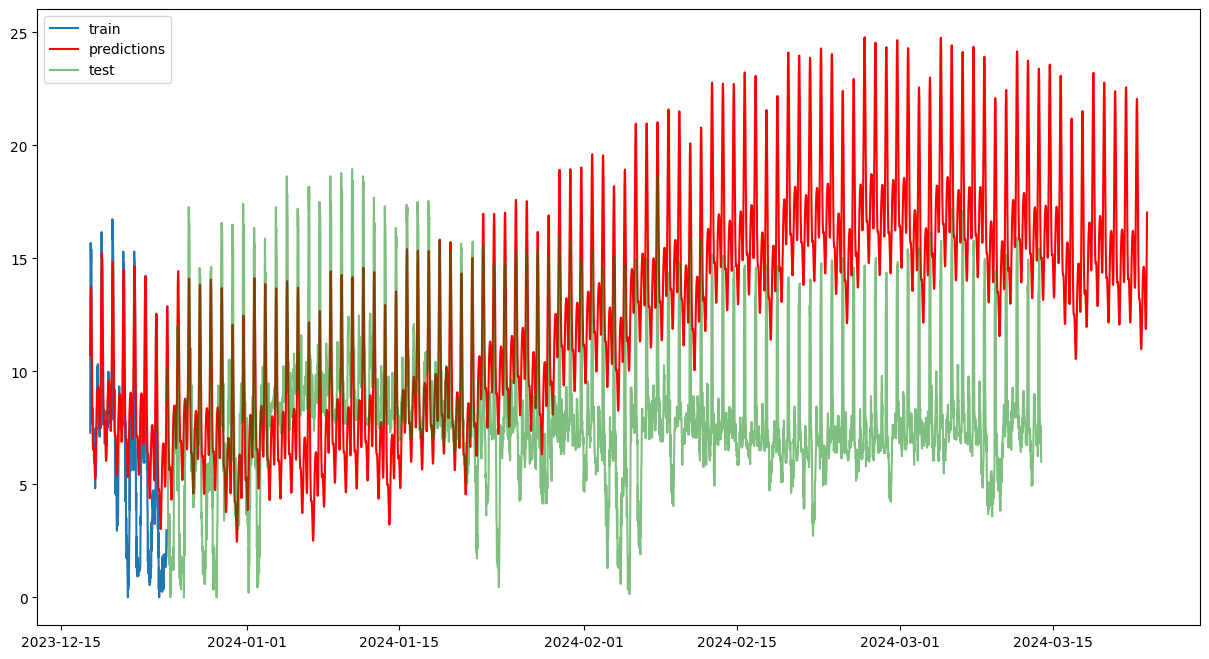

In [63]:
days =7

date = train['ds'][train.index[-1]]- timedelta(days=days)
date_end = date + timedelta(days=days+90)
# date
train_date=train.loc[train['ds'] >= date ].copy()
forecast_date=forecast.loc[(forecast['ds'] >= date ) & (forecast['ds'] <= date_end)].copy()
test_date=test.loc[test['ds'] <= date_end ].copy()

# train_date.head()
plt.figure(figsize=(15,8))
plt.plot(train_date['ds'], train_date['y'], label='train')
plt.plot(forecast_date['ds'], forecast_date['yhat'], label='predictions', color = 'red')
plt.plot(test_date['ds'], test_date['y'], label='test', color = 'green', alpha =0.5)
plt.legend(loc='best')

/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version thi

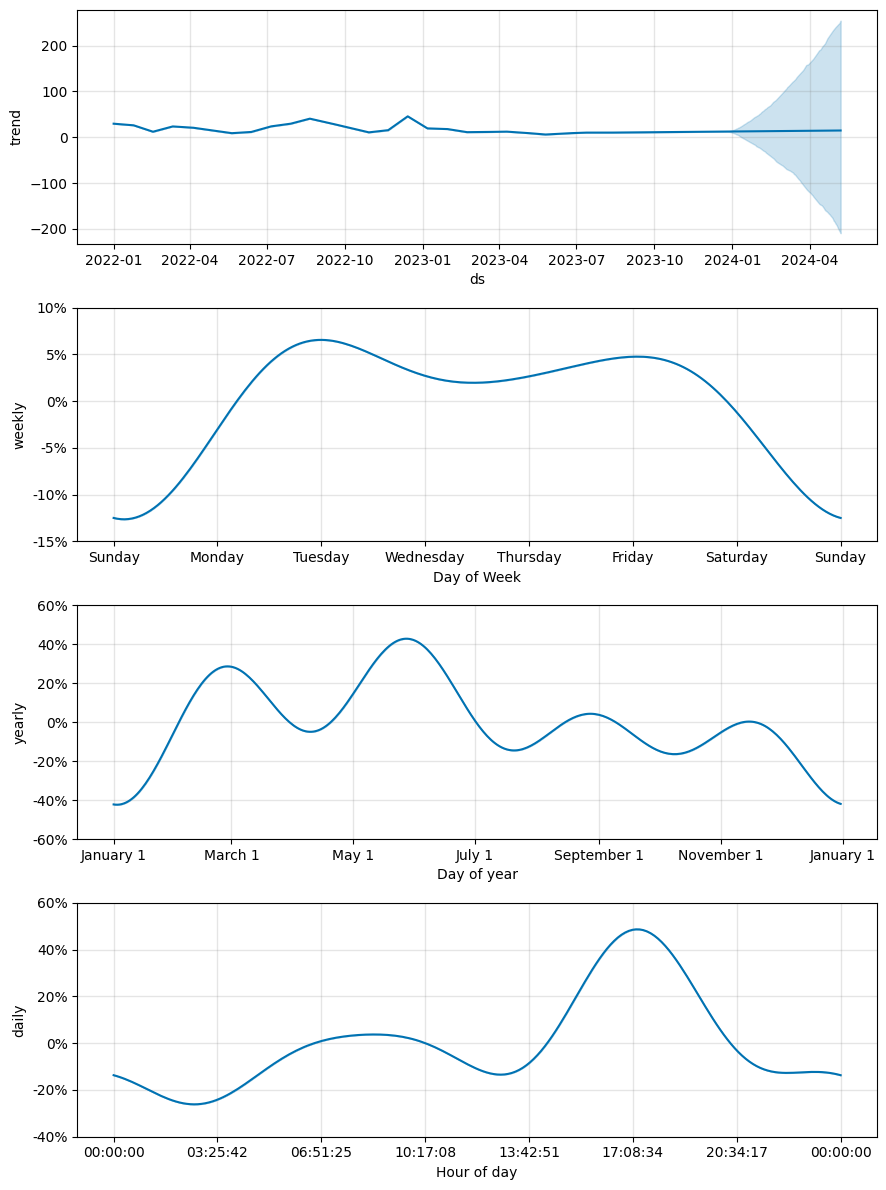

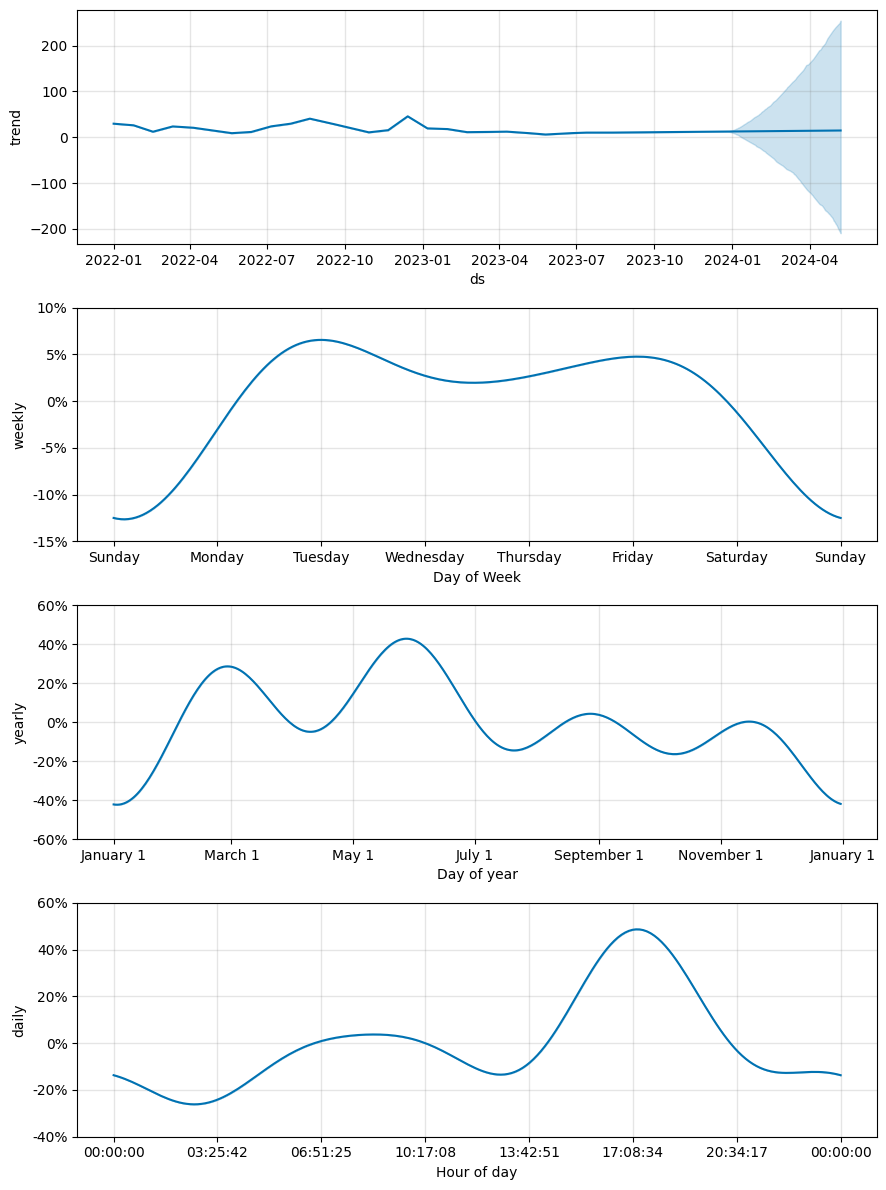

In [64]:
model.plot_components(forecast)

In [65]:
model

In [66]:
df_cv = cross_validation(model = model, initial='180 days', horizon='30 days', period='3 days')

df_p = performance_metrics(df_cv)

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/171 [00:00<?, ?it/s]22:13:50 - cmdstanpy - INFO - Chain [1] start processing
22:13:54 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 1/171 [00:04<12:10,  4.29s/it]22:13:54 - cmdstanpy - INFO - Chain [1] start processing
22:14:00 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 2/171 [00:10<15:22,  5.46s/it]22:14:00 - cmdstanpy - INFO - Chain [1] start processing
22:14:04 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 3/171 [00:14<13:16,  4.74s/it]22:14:04 - cmdstanpy - INFO - Chain [1] start processing
22:14:07 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 4/171 [00:17<11:48,  4.24s/it]22:14:08 - cmdstanpy - INFO - Chain [1] start processing
22:14:12 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 5/171 [00:22<11:52,  4.29s/it]22:14:12 - cmdstanpy - INFO - Chain [1] start processing


In [67]:
df_p

,horizon,mse,rmse,mae,mdape,smape,coverage
0,3 days 00:00:00,39.555375,6.289306,4.077339,0.192147,0.280413,0.910210
1,3 days 00:30:00,39.732184,6.303347,4.085873,0.192537,0.280779,0.909925
2,3 days 01:00:00,39.969970,6.322181,4.095333,0.192720,0.281130,0.909438
3,3 days 01:30:00,40.204310,6.340687,4.103939,0.192950,0.281462,0.908951
4,3 days 02:00:00,40.437510,6.359049,4.112552,0.193157,0.281782,0.908423
...,...,...,...,...,...,...,...
1292,29 days 22:00:00,843.862444,29.049311,15.032215,0.504166,0.823552,0.878330
1293,29 days 22:30:00,845.269248,29.073515,15.039941,0.504166,0.823733,0.878330
1294,29 days 23:00:00,846.651810,29.097282,15.048116,0.504166,0.823999,0.878452
1295,29 days 23:30:00,848.064778,29.121552,15.056599,0.504243,0.824245,0.878614


In [68]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-07-02 16:00:00,26.280225,17.246715,35.232057,26.08,2022-07-02 15:30:00
1,2022-07-02 16:30:00,28.400742,19.739222,37.070484,26.80,2022-07-02 15:30:00
2,2022-07-02 17:00:00,29.800512,21.401965,38.408744,26.69,2022-07-02 15:30:00
3,2022-07-02 17:30:00,30.246189,21.506550,39.070852,27.18,2022-07-02 15:30:00
4,2022-07-02 18:00:00,29.660586,21.310643,38.474737,21.63,2022-07-02 15:30:00


In [69]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
246235,2023-12-24 13:30:00,12.424560,-5.072115,31.755679,1.40,2023-11-24 15:30:00
246236,2023-12-24 14:00:00,13.475991,-5.412427,34.605448,1.54,2023-11-24 15:30:00
246237,2023-12-24 14:30:00,15.020395,-5.711903,38.883282,1.46,2023-11-24 15:30:00
246238,2023-12-24 15:00:00,16.918027,-5.780250,43.310954,2.13,2023-11-24 15:30:00
246239,2023-12-24 15:30:00,18.945641,-7.526662,48.887994,2.97,2023-11-24 15:30:00


/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


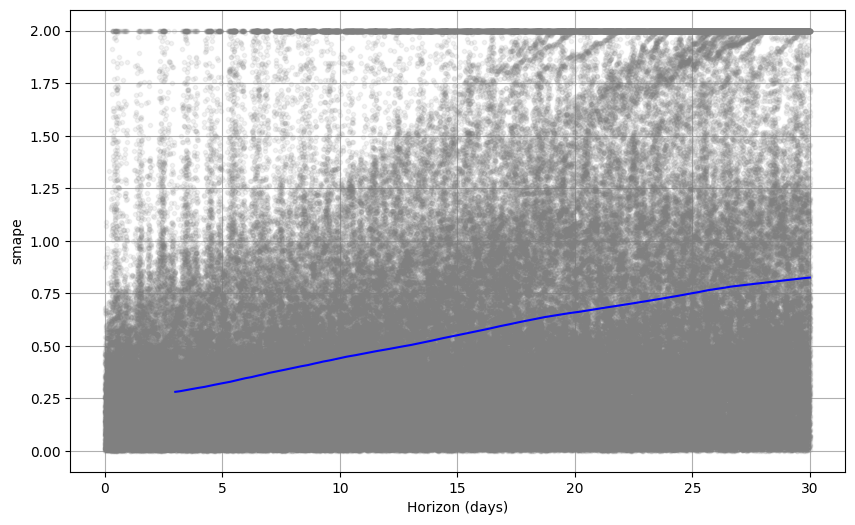

In [70]:
plot_cross_validation_metric(df_cv, metric='smape');

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
df.head()

,ds,y
63650,2023-01-01 00:30:00,7.29
63651,2023-01-01 01:00:00,7.95
63652,2023-01-01 01:30:00,1.78
63653,2023-01-01 02:00:00,4.19
63654,2023-01-01 02:30:00,1.88


In [37]:
df_index=df.copy()
df_index.set_index('ds', inplace=True)

In [38]:
df_index.head()

,y
ds,
2023-01-01 00:30:00,7.29
2023-01-01 01:00:00,7.95
2023-01-01 01:30:00,1.78
2023-01-01 02:00:00,4.19
2023-01-01 02:30:00,1.88


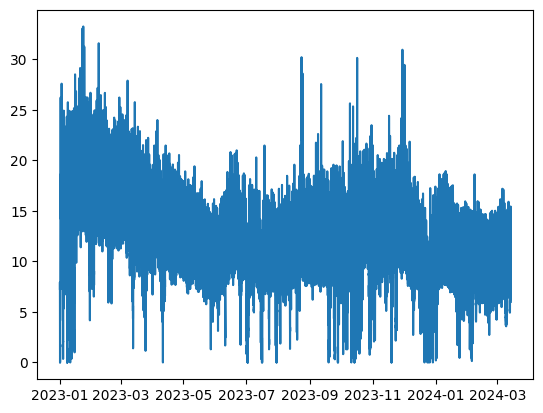

In [39]:
plt.plot(df_index)

# plt.plot(

# df['ds']['2019']

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21021 entries, 63650 to 84670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      21021 non-null  datetime64[ns]
 1   y       21021 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 492.7 KB


In [41]:
date1 = df_index.index[0]
date1

Timestamp('2023-01-01 00:30:00')

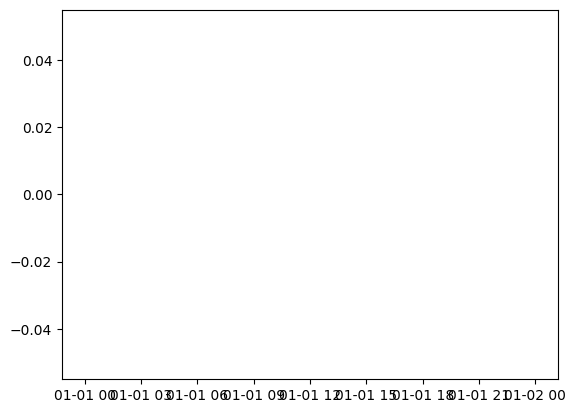

In [42]:
date = '2019-06-01'

df_date=df_index.loc[df_index.index <= date ].copy()
plt.plot(df_date)


# df_date.tail()

# df_index.set_index('ds', inplace=True)

In [43]:
Prophet(growth = 'linear', changepoints = None, n_changepoints= 25, changepoint_range= 0.8, yearly_seasonality= 'auto', weekly_seasonality= 'auto',
        daily_seasonality= 'auto', holidays: Any | None = None, seasonality_mode: str = 'additive', seasonality_prior_scale: float = 10, holidays_prior_scale: float = 10,
        changepoint_prior_scale: float = 0.05, mcmc_samples: int = 0, interval_width: float = 0.8, uncertainty_samples: int = 1000, stan_backend: Any | None = None,
        scaling: str = 'absmax', holidays_mode: Any | None = None)

SyntaxError: positional argument follows keyword argument (1082694179.py, line 2)

In [ ]:
df_index.index = pd.to_datetime(df_index.index)
df_index = df_index.asfreq('30T')


In [ ]:
# Now, you can run seasonal decomposition
result_add = seasonal_decompose(df_index['y'], model='additive')
result_add.plot();